## Challenge 3: Propose a project
My project will be network intrusion data analysis/anomaly detection

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
df = spark.read.csv('kddcup.data.gz', inferSchema=True, header=False)
df.head()

Row(_c0=0, _c1=u'tcp', _c2=u'http', _c3=u'SF', _c4=215, _c5=45076, _c6=0, _c7=0, _c8=0, _c9=0, _c10=0, _c11=1, _c12=0, _c13=0, _c14=0, _c15=0, _c16=0, _c17=0, _c18=0, _c19=0, _c20=0, _c21=0, _c22=1, _c23=1, _c24=0.0, _c25=0.0, _c26=0.0, _c27=0.0, _c28=1.0, _c29=0.0, _c30=0.0, _c31=0, _c32=0, _c33=0.0, _c34=0.0, _c35=0.0, _c36=0.0, _c37=0.0, _c38=0.0, _c39=0.0, _c40=0.0, _c41=u'normal.')

In [4]:
old_columns = df.schema.names

In [5]:
new_columns = ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [6]:
df = reduce(lambda df, idx: df.withColumnRenamed(old_columns[idx], new_columns[idx]), xrange(len(old_columns)), df)

In [7]:
df.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true

In [8]:
df.cache()

DataFrame[duration: int, protocol_type: string, service: string, flag: string, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, label: string]

## Data visualization

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
dfp = df.toPandas()

In [42]:
dfp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [43]:
dfp.shape

(4898431, 42)

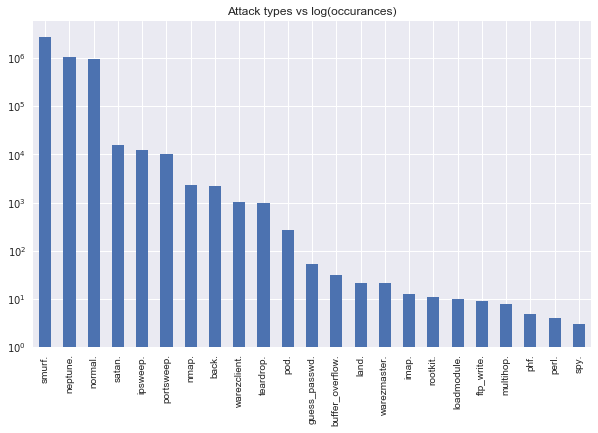

In [52]:
dfp.label.value_counts().plot(kind='bar', figsize=(10, 6), log=True, title='Attack types vs log(occurances)')

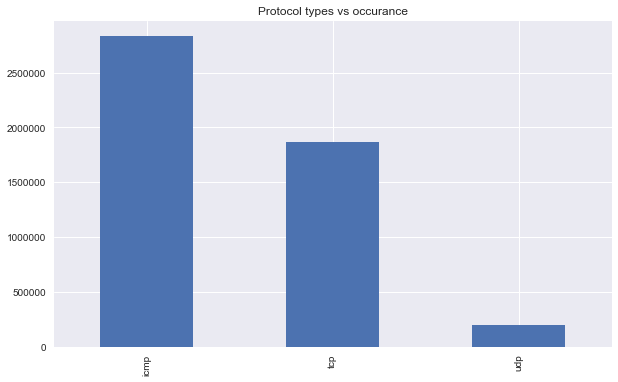

In [63]:
dfp.protocol_type.value_counts().plot(kind='bar', figsize=(10, 6), title='Protocol types vs occurance')

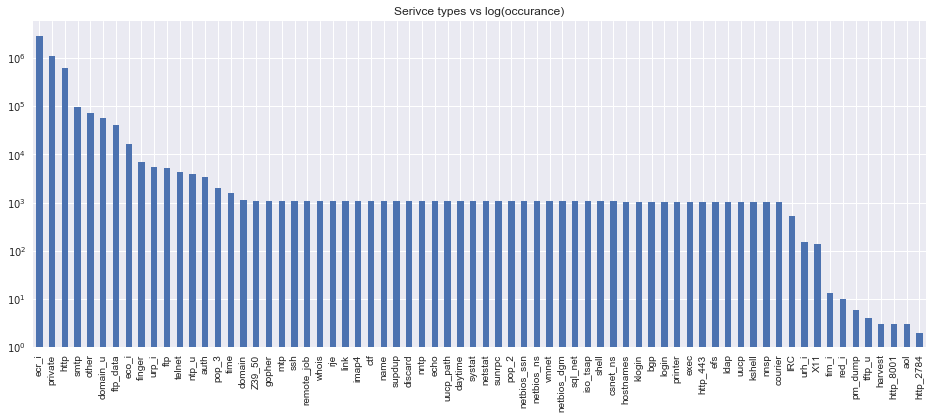

In [57]:
dfp.service.value_counts().plot(kind='bar', figsize=(16, 6), title='Serivce types vs log(occurance)', log=True)

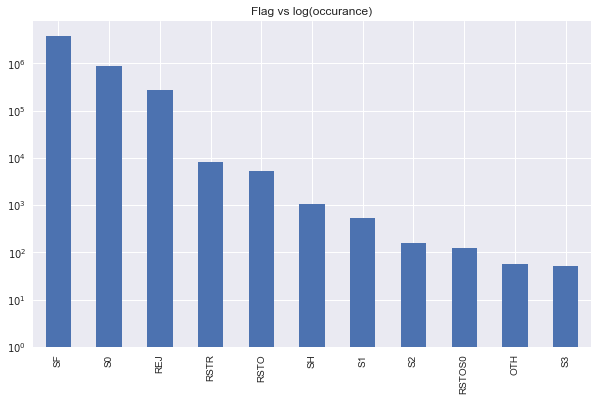

In [60]:
dfp.flag.value_counts().plot(kind='bar', figsize=(10, 6), title='Flag vs log(occurance)', log=True)

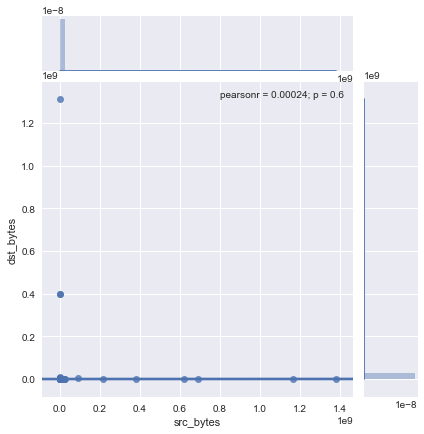

In [70]:
sns.jointplot('src_bytes', 'dst_bytes', dfp, kind='reg')

## Modeling without categorical features

In [11]:
from pyspark.ml.feature import VectorAssembler

In [12]:
inputCols = [c for c in df.columns if c not in ['protocol_type', 'service', 'flag', 'label']]

In [13]:
inputData = df.select(inputCols)
inputData.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- srv_serror_rate: double (nul

In [14]:
assembler = VectorAssembler(inputCols=inputCols, outputCol='features')

In [15]:
outputData = assembler.transform(inputData)

In [16]:
outputData.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- srv_serror_rate: double (nul

In [17]:
from pyspark.ml.feature import StandardScaler

In [18]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=False)

In [19]:
data = scaler.fit(outputData).transform(outputData)

In [20]:
data.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- srv_serror_rate: double (nul

In [21]:
data.select('scaled_features').head()

Row(scaled_features=SparseVector(38, {1: 0.0002, 2: 0.0699, 8: 2.8522, 19: 0.0047, 20: 0.0041, 25: 2.5687}))

In [71]:
data.cache()

DataFrame[duration: int, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, features: vector, scaled_features: vector]

In [23]:
from pyspark.ml.clustering import KMeans

In [24]:
clusters = range(20, 300, 20)
costs = []

for k in clusters:
    kmeans = KMeans(featuresCol='scaled_features').setK(k).setSeed(123)
    model = kmeans.fit(data)
    wssse = model.computeCost(data)
    costs.append(wssse)
    print 'When K = %d, WSSE = %f' %(k, wssse)

When K = 20, WSSE = 41849315.485582
When K = 40, WSSE = 12418783.777629
When K = 60, WSSE = 6554542.031470
When K = 80, WSSE = 4583253.866483
When K = 100, WSSE = 3399828.365019
When K = 120, WSSE = 2634770.315575
When K = 140, WSSE = 2296207.644119
When K = 160, WSSE = 1859924.251139
When K = 180, WSSE = 1672358.333776
When K = 200, WSSE = 1574455.162674
When K = 220, WSSE = 1421544.843445
When K = 240, WSSE = 1307032.604029
When K = 260, WSSE = 1146100.621498
When K = 280, WSSE = 1087431.931246


In [28]:
result = pd.DataFrame({'Cluster': clusters, 'Cost': costs})

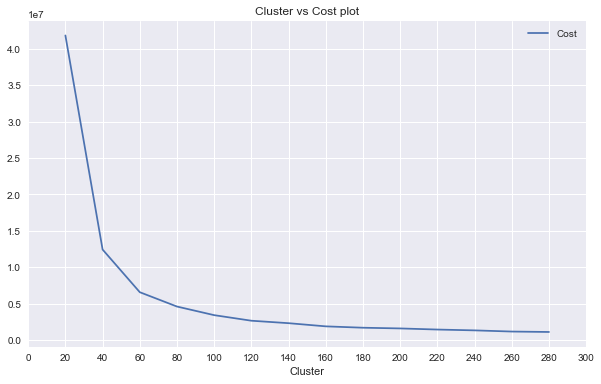

In [35]:
result.plot(x='Cluster', y='Cost', xticks=range(0, 320, 20), figsize=(10, 6), title='Cluster vs Cost plot')

## Modeling with categorical features

In [72]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

In [73]:
inputCols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [85]:
def onehotPipe(col):
    indexer = StringIndexer(inputCol=col, outputCol=col+'_indexed')
    encoder = OneHotEncoder(inputCol=col+'_indexed', outputCol=col+'_vec')
    pipeline = Pipeline(stages=[indexer, encoder])
    return (pipeline, col+'_vec')

In [86]:
prototype_pipe, prototype_col = onehotPipe('protocol_type')
service_pipe, service_col = onehotPipe('service')
flag_pipe, flag_col = onehotPipe('flag')

In [87]:
inputCols = inputCols + [prototype_col, service_col, flag_col]

In [89]:
assembler = VectorAssembler(inputCols=inputCols, outputCol='features')
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=False)

In [94]:
clusters = range(20, 300, 20)
costs = []

for k in clusters:
    kmeans = KMeans(featuresCol='scaled_features').setK(k).setSeed(123)
    pipeline = Pipeline(stages=[prototype_pipe, service_pipe, flag_pipe, assembler, scaler, kmeans])
    model = pipeline.fit(df)
    # Within Set Sum of Squared Error
    wssse = model.stages[-1].computeCost(model.transform(df))
    costs.append(wssse)
    print 'When K = %d, WSSE = %f' %(k, wssse)

When K = 20, WSSE = 399442541.620606
When K = 40, WSSE = 288541853.314868
When K = 60, WSSE = 197672673.252625
When K = 80, WSSE = 126581887.910466
When K = 100, WSSE = 50878326.544621
When K = 120, WSSE = 24647350.264074
When K = 140, WSSE = 17805305.461958
When K = 160, WSSE = 10318152.496665
When K = 180, WSSE = 9170551.350155
When K = 200, WSSE = 7491650.443012
When K = 220, WSSE = 6066254.054970
When K = 240, WSSE = 5707949.939804
When K = 260, WSSE = 4927966.980331
When K = 280, WSSE = 4321123.032603


In [95]:
new_result = pd.DataFrame({'Cluster': clusters, 'Cost': costs})

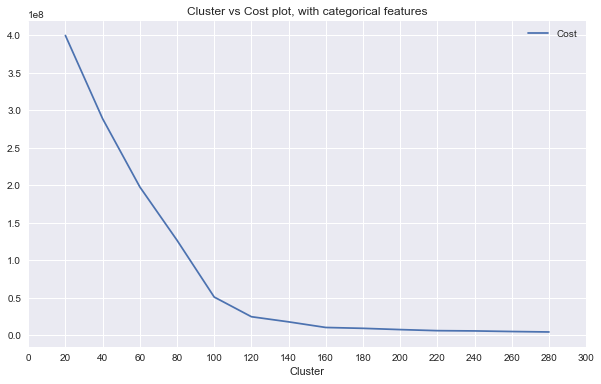

In [96]:
new_result.plot(x='Cluster', y='Cost', xticks=range(0, 320, 20), figsize=(10, 6), title='Cluster vs Cost plot, with categorical features')

## Result

In [97]:
# Let's choose K=160

kmeans = KMeans(featuresCol='scaled_features').setK(160).setSeed(123)
pipeline = Pipeline(stages=[prototype_pipe, service_pipe, flag_pipe, assembler, scaler, kmeans])
model = pipeline.fit(df)

In [103]:
predictions = model.transform(df).select('prediction', 'label')

In [108]:
predictions.groupby('prediction', 'label').count().orderBy('prediction', 'count').show()

+----------+----------+-------+
|prediction|     label|  count|
+----------+----------+-------+
|         0|portsweep.|      2|
|         0|     nmap.|      6|
|         0|      pod.|      7|
|         0|    satan.|      7|
|         0|  ipsweep.|     40|
|         0|   normal.|   3380|
|         0|    smurf.|2807851|
|         1|portsweep.|      9|
|         1|  neptune.| 812920|
|         2|    satan.|      3|
|         2|   normal.|     11|
|         2|  ipsweep.|    164|
|         2|portsweep.|    362|
|         2|  neptune.| 192990|
|         3|    satan.|      2|
|         3|portsweep.|     10|
|         3|  neptune.|   1041|
|         4|    satan.|      3|
|         4|portsweep.|     13|
|         4|  neptune.|   1038|
+----------+----------+-------+
only showing top 20 rows



In [109]:
df.unpersist()

DataFrame[duration: int, protocol_type: string, service: string, flag: string, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, label: string]

In [110]:
data.unpersist()

DataFrame[duration: int, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, features: vector, scaled_features: vector]

In [111]:
spark.stop()

## Next steps:
* Try more sophisticated algorithms
* Spark streaming